## Gradient Boosting 기법

In [1]:
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

In [2]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

### 이전 학습 내용
* (1) 지도학습에는 classificatoin(분류)와 Regression(회귀)로 나누어진다.
* (2) Classification은 이진분류(binary classification)와 다중 분류가 있다.
* (3) 모델을 만들때 과적합(Overfitting)을 피하고 일반화(generalization) 되도록 해야 한다.

### 선형모델(linear Regression)

* 라쏘(Lasso Regression) - L1 규제(regularization)
    * 가중치를 w을 0으로 가깝게 제한하지만, 실제로 어떤 계수를 0으로 만든다.
* 릿지(Ridge Regression) - L2 규제(regularization)
    * 가중치의 절대값을 가능한 한 작게 만든다.(w의 모든 원소가 0에 가깝게 되기를 원한다.)

### 그래디언트 부스팅(Gradient Boosting)

* (가) 여러 개의 결정 트리를 묶어 강력한 모델을 만든다.
* (나) 분류(Classification)과 회귀(Regression)에 모두 사용 가능.
* (다) 랜덤포레스트(random forest)와 달리 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다.
    * 이전 트리의 오차를 얼마나 강하게 보정할 것인가를 제어(learning_rate이다.)
* (라) 무작위성이 없으며, 대신 강력한 사전 가지치기(pruning)을 사용
* (마) 각각의 트리는 일부에 대해서만 예측을 잘 수행, 트리가 많을수록 성능이 좋아짐
* (바) 랜덤 포레스트보다 매개 변수 설정에 더 민감하지만, 잘 조정하면 더 높은 정확도를 얻을 수 있음.
* (사) 중요한 매개변수 중의 하나는 learning_rate이다.
    * 학습률이 크면 보정을 강하게 하기 때문에 복잡한 모델을 만든다.
* (아) n_estimators 의 값을 키우면 앙상블에 더 많은 트리가 추가되어, 모델의 복잡도는 커지지만 훈련 세트에서의 실수가 보완된다.
* (자) 트리의 깊이가 5정도로서 깊지 않은 트리를 사용하여 메모리 사용이 적고 예측도 빠르다.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
# n_features : 변수의 개수
# feature_names : 변수의 이름 
# model : 모델 
def plot_feature_important_up(model, n_features, feature_names):
    imp = model.feature_importances_     # feature의 중요도 
    plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
    plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
    plt.xlabel("feature importance")   # x축 레이블(제목)
    plt.ylabel("feature")              # y축 제목
    plt.ylim(-1, n_features)           # y축의 범위 지정 

### GradientBoosting 알고리즘 실습
* depth = 3
* tree 100개(n_estimators)
* 학습률 : 0.1 사용

* 데이터 셋 : load_breast_cancer
    * classification용 유방암 진단 자료

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

cancer = load_breast_cancer()

# 데이터 확인
print(cancer.keys())
print(cancer.target_names) # 목적변수(종속변수)
print(cancer.target)
print(cancer.feature_names)
print(cancer.data.shape)   # row : 569, column : 30
print(cancer.data)         # 설명변수(독립변수)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 

In [6]:
# 데이터 나누기
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

# 모델 생성 및 학습
# 기본값 사용
# max_depth = 3, n_estimators = 100, learning_rate = 0.1
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [7]:
# 정확도 확인
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


* 훈련 세트의 정확도가 100%이므로 과대적합(Overfitting)

### 02. 훈련세트에 대한 과적합을 줄이기

* max_depth 조절 : 트리의 깊이
* learning_rate 조절 : 학습 속도 조절

### 모델의 depth 조절
* 훈련 세트의 정확도는 떨어지지만 테스트 세트의 정확도는 향상됨.

In [8]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


### 트리의 학습률(learning_rate) 조절
* 0.1 -> 0.01 로 조절

In [9]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


In [10]:
# model : 모델
# n_features : feature(변수의 개수)
# feature_names : 특성의 이름
def plot_feature_important_up(model, n_features, feature_names):
    imp = model.feature_importances_     # feature의 중요도 
    plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
    plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
    plt.xlabel("feature importance")   # x축 레이블(제목)
    plt.ylabel("feature")              # y축 제목
    plt.ylim(-1, n_features)           # y축의 범위 지정 

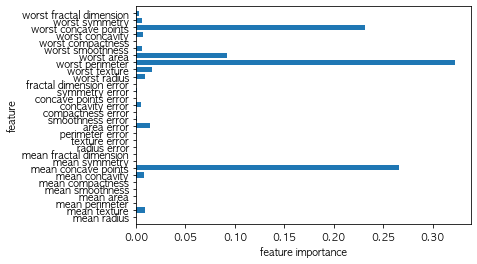

In [12]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1,
                                  learning_rate=0.1)
gbrt.fit(X_train, y_train)

feature_num = X_train.shape[1]
feature_names = cancer.feature_names

plot_feature_important_up(gbrt, feature_num, feature_names)

In [13]:
import pandas as pd
import seaborn as sns

In [15]:
gbrt = GradientBoostingClassifier(random_state=0, 
                                  learning_rate=0.01)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

<AxesSubplot:title={'center':'feature importances'}>

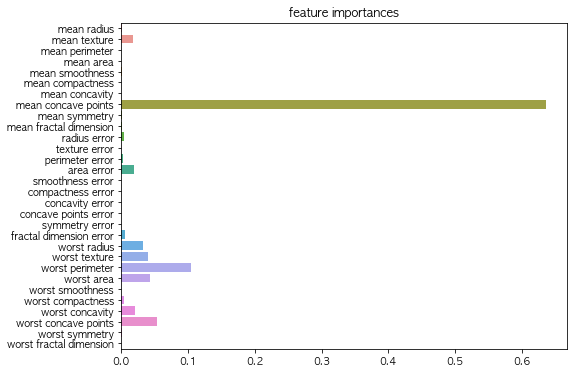

In [16]:
fea_imp_values = gbrt.feature_importances_
importances = pd.Series(fea_imp_values, index=feature_names)

plt.figure(figsize=(8,6))
plt.title('feature importances')
sns.barplot(x=importances, y=importances.index)

* 그래디언트 부스팅은 일부 특성을 완전히 무시
* 비슷한 종류의 데이터에서 보통 더 안정적인 랜덤 포레스트를 먼저 적용해본다.

### 모델의 장단점
* 단점 :
    * 매개변수를 잘 조정해야 하며, 훈련 시간이 길다.
* 장점 :
    * feature의 scale(범위, 값)을 조정하지 않아도 이진특성이 연속적인 특성에서 잘 동작
    * feature의 스케일을 조정하지 않아도 된다.

### 매개변수
* 이전트리의 오차를 보정하는 정도 조절 : learning_rate
    * learning_rate를 낮추면 =>> 비슷한 복잡도의 모델을 만들기 위해 더 많은 트리를 추가해야 한다.
* n_estimator가 클수록 좋다.
* n_estimator가 크면 그래디언트 부스팅은 과적합의 가능성이 있음.
* 트리의 복잡도를 낮추는 max_depth (또는 max_leaf_nodes)
* 보통 부스팅 모델에서 max_depth를 매우작게 설정하며 트리의 깊이가 5보다 깊어지지 않도록 한다.
* n_estimators를 맞춘 이후에 learning_rate를 찾는다.